# Analyze System
The purpose of this notebook is to analyze the .csv files (results, data) created from predictsystem.ipynb, and generate candidates for full long Nbody simulations.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import rebound
%matplotlib inline

## Load data

In [2]:
path = '/mnt/raid-cita/asilburt/stability_predict/'
system = "Kepler-431"    #KOI-0156, KOI-0168, KOI-2086, Kepler-431
suffix = ''

#load data and predicted stability probabilities
data = pd.read_csv(path+"systems/%s_data%s.csv"%(system,suffix))
#results = pd.read_csv(path+"systems/%s_results%s.csv"%(system,suffix))
Ms = {}; Ms["KOI-0156"] = 0.56; Ms["KOI-0168"] = 1.11; Ms["KOI-2086"] = 1.04; Ms['Kepler-431'] = 1.071;
epoch = 780

#get e
try:
    data["e1"] = np.sqrt(data["h1"]**2 + data["k1"]**2)
    data["e2"] = np.sqrt(data["h2"]**2 + data["k2"]**2)
    data["e3"] = np.sqrt(data["h3"]**2 + data["k3"]**2)
except:
    print("can't find h and k entries, calculating.")
    data["h1"], data["k1"] = data["e1"]*np.sin(data["w1"]), data["e1"]*np.cos(data["w1"])
    data["h2"], data["k2"] = data["e2"]*np.sin(data["w2"]), data["e2"]*np.cos(data["w2"])
    data["h3"], data["k3"] = data["e3"]*np.sin(data["w3"]), data["e3"]*np.cos(data["w3"])

#load Nbody results
columns = ["name","id","shadow","maxorbs","P1","time","dE","elapsed_time"]
try:
    Nbody = pd.read_csv(path+"systems/%s_Nbodyresults%s.csv"%(system,suffix),names=columns)
except:
    print("Nbody results does not exist for this system yet.")

can't find h and k entries, calculating.


In [29]:
data.tail()

,Unnamed: 0,m1,MA1,P1,e1,w1,m2,MA2,P2,e2,...,MA3,P3,e3,w3,h1,k1,h2,k2,h3,k3
1445,1445,0.319662,3.958482,6.803,0.000116,5.860106,1.230867,3.955469,8.703,0.061163,...,5.503072,11.922,0.123104,3.143355,-0.000048,0.000106,0.049930,0.035326,-0.000217,-0.123104
1446,1446,0.454807,5.785265,6.803,0.000051,3.027307,0.410003,5.919673,8.703,0.008595,...,6.219926,11.922,0.037215,2.398961,0.000006,-0.000051,0.008456,-0.001540,0.025166,-0.027416
1447,1447,0.115691,1.265569,6.803,0.092637,3.450900,0.151496,4.100163,8.703,0.000079,...,3.397734,11.922,0.000015,1.442666,-0.028199,-0.088241,-0.000031,0.000073,0.000015,0.000002
1448,1448,0.092090,5.690041,6.803,0.000785,5.914831,0.239099,1.542800,8.703,0.000850,...,0.834516,11.922,0.000340,5.925447,-0.000283,0.000732,-0.000050,-0.000848,-0.000119,0.000319
1449,1449,0.306672,3.769612,6.803,0.001916,0.087207,0.131023,4.045160,8.703,0.000493,...,4.228913,11.922,0.019362,4.883047,0.000167,0.001908,0.000438,-0.000226,-0.019081,0.003288


# make new data dataframe with same indices as Nbody

In [30]:
Nbody.tail()

,name,id,shadow,maxorbs,P1,time,dE,elapsed_time
2892,Kepler-431_1e9orbits_id802_shadow1,802,1,1.000000e+09,0.117108,117108200.0,2.382891e-10,77203.43
2893,Kepler-431_1e9orbits_id1443_shadow1,1443,1,1.000000e+09,0.117108,117108200.0,1.150128e-09,77393.70
2894,Kepler-431_1e9orbits_id338_shadow1,338,1,1.000000e+09,0.117108,117108200.0,7.360825e-09,78919.86
2895,Kepler-431_1e9orbits_id958_shadow0,958,0,1.000000e+09,0.117108,117108200.0,1.326587e-10,79113.30
2896,Kepler-431_1e9orbits_id804_shadow1,804,1,1.000000e+09,0.117108,117108200.0,1.171187e-09,80284.46


In [6]:
def writedata(row):
    simid = row['id']
    ret = data.iloc[simid]
    ret.name = row.name
    return ret

In [7]:
newdata = Nbody.apply(writedata, axis=1)
#newresults = Nbody.apply(writeresults, axis=1)

In [31]:
newdata.tail()

,Unnamed: 0,m1,MA1,P1,e1,w1,m2,MA2,P2,e2,...,MA3,P3,e3,w3,h1,k1,h2,k2,h3,k3
2892,802.0,0.319662,2.541740,6.803,0.052705,3.001534,0.249227,2.533851,8.703,0.000088,...,3.023734,11.922,0.000026,6.218048,0.007358,-0.052189,-0.000084,-0.000027,-0.000002,0.000026
2893,1443.0,0.041011,2.496326,6.803,0.002849,5.758656,0.418596,3.610006,8.703,0.001053,...,1.380608,11.922,0.014883,1.815819,-0.001427,0.002466,0.000853,0.000618,0.014438,-0.003610
2894,338.0,0.829964,0.998134,6.803,0.008414,5.649242,0.362025,5.536948,8.703,0.009266,...,5.921244,11.922,0.041194,1.323503,-0.004984,0.006779,-0.003202,-0.008695,0.039941,0.010084
2895,958.0,0.340185,3.411411,6.803,0.000740,4.202600,0.536897,0.369776,8.703,0.000319,...,4.183377,11.922,0.017687,1.403388,-0.000646,-0.000361,-0.000308,-0.000086,0.017440,0.002947
2896,804.0,0.474070,0.709334,6.803,0.018129,0.804231,0.571367,1.039456,8.703,0.009187,...,0.128676,11.922,0.001056,0.140318,0.013058,0.012575,-0.004479,-0.008021,0.000148,0.001045


In [9]:
stablemask = (Nbody.shadow == 0)&(Nbody.time == 117108200.0)
stablemask.sum()

1037

In [10]:
unstablemask = (Nbody.shadow == 0)&(Nbody.time < 117108200.0)
unstablemask.sum()

413

## Plot Stability Predictions
These are not Nbody results, these are predictions!

In [11]:
aripath = '/mnt/raid-cita/asilburt/stability_predict/simulation_archives/Kepler-431/'

In [12]:
import os
sims = []
for i in range(1450):
    filename = os.path.join(aripath, "Kepler-431_1e9orbits_id{0}_shadow0_init.bin".format(i))
    try:
        sims.append(rebound.Simulation.from_file(filename))
    except:
        sims.append(np.nan)

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/rebound/simulation.py:374: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/rebound/simulation.py:374: RuntimeWarning: Unknown field found in binary file.
  warnings.warn(message, RuntimeWarning)


In [13]:
Nout = len(sims)
h = np.zeros(Nout)
k = np.zeros(Nout)
for i, sim in enumerate(sims):
    try:
        p2 = sim.particles[2]
        h[i] = p2.e*np.sin(p2.pomega)
        k[i] = p2.e*np.cos(p2.pomega)
    except:
        h[i] = np.nan
        k[i] = np.nan

In [21]:
import dill
modelpath = '/mnt/raid-cita/dtamayo/MLstability/Analysis/newmodels/'
model, features, feature_function = dill.load(open(modelpath+"oldmodel.pkl", 'rb'))

In [23]:
%%time
proba = [model.predict_proba(feature_function(sim)[features])[0][1] if sim is not np.nan else np.nan for sim in sims]

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 7min 24s, sys: 0 ns, total: 7min 24s
Wall time: 7min 16s


In [24]:
proba = np.array(proba)

In [25]:
pstablemask = (proba > 0.5)
pstablemask.sum()

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


1015

In [26]:
punstablemask = (proba <= 0.5)
punstablemask.sum()

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


434

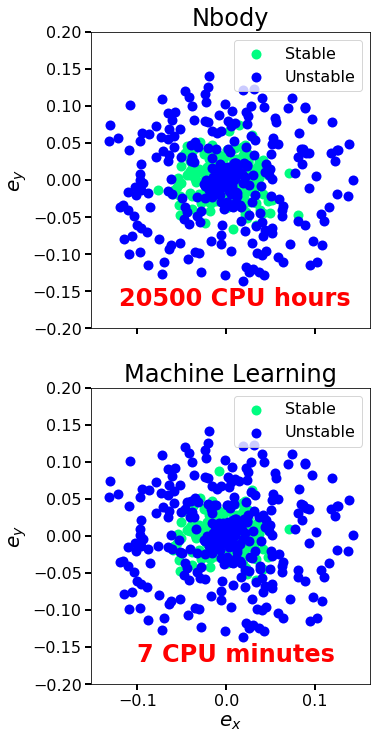

In [27]:
import matplotlib
plt.style.use('paper')
colorbar = 'winter'
cmap = matplotlib.cm.get_cmap(colorbar)
f, (ax1, ax2) = plt.subplots(2,1, figsize=[5, 12], sharex=True, sharey=True)
ax1.scatter(newdata["h2"][stablemask], newdata["k2"][stablemask], c=cmap(0.99), lw=0, label='Stable')
ax1.scatter(newdata["h2"][unstablemask], newdata["k2"][unstablemask], c=cmap(0.), lw=0, label='Unstable')
ax2.scatter(h[pstablemask], k[pstablemask], c=cmap(0.99), lw=0, label='Stable')
ax2.scatter(h[punstablemask], k[punstablemask], c=cmap(0.), lw=0, label='Unstable')

ax1.set_ylim([-0.2, 0.2])
ax1.set_ylabel(r'$e_y$') 
ax2.set_xlabel(r'$e_x$')
ax2.set_ylabel(r'$e_y$')
ax1.set_title("Nbody")
ax2.set_title("Machine Learning")

ax1.text(-0.12, -0.17, '20500 CPU hours', weight='bold', size=24, color='red')
ax2.text(-0.1, -0.17, '7 CPU minutes', weight='bold', size=24, color='red')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.savefig("NbodyvsML.png", bbox_inches="tight")

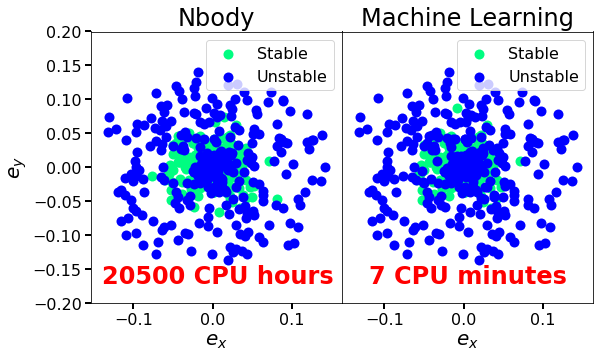

In [28]:
import matplotlib
plt.style.use('paper')
colorbar = 'winter'
cmap = matplotlib.cm.get_cmap(colorbar)
f, (ax1, ax2) = plt.subplots(1,2, figsize=[9, 5], sharex=True, sharey=True)
ax1.scatter(newdata["h2"][stablemask], newdata["k2"][stablemask], c=cmap(0.99), lw=0, label='Stable')
ax1.scatter(newdata["h2"][unstablemask], newdata["k2"][unstablemask], c=cmap(0.), lw=0, label='Unstable')
ax2.scatter(h[pstablemask], k[pstablemask], c=cmap(0.99), lw=0, label='Stable')
ax2.scatter(h[punstablemask], k[punstablemask], c=cmap(0.), lw=0, label='Unstable')

ax1.set_ylim([-0.2, 0.2])
ax1.set_ylabel(r'$e_y$') 
ax1.set_xlabel(r'$e_x$')
ax2.set_xlabel(r'$e_x$')
ax1.set_title("Nbody")
ax2.set_title("Machine Learning")

ax1.text(-0.14, -0.17, '20500 CPU hours', weight='bold', size=24, color='red')
ax2.text(-0.12, -0.17, '7 CPU minutes', weight='bold', size=24, color='red')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.subplots_adjust(wspace=0)
ax2.tick_params(axis='y', which='both', left='off', right='off')
plt.savefig("NbodyvsML.png", bbox_inches="tight")

# Lissauer Comparisons

In [59]:
def checkSLstable(sim):
    M = Ms['Kepler-431']
    Mearth = 3.e-6
    dpy = 365.25
    a1 = (sim.P1/dpy)**(2./3.)
    a2 = (sim.P2/dpy)**(2./3.)
    a3 = (sim.P3/dpy)**(2./3.)
    RH1 = ((sim.m1 + sim.m2)*Mearth/(3.*M))**(1./3.)*(a1+a2)/2.
    RH2 = ((sim.m2 + sim.m3)*Mearth/(3.*M))**(1./3.)*(a2+a3)/2.
    beta1 = (a2-a1)/RH1
    beta2 = (a3-a2)/RH2
    b = 1.496
    c = -3.142 # sec 3.1 of Smith & Lissauer for 3 planets
    logt = b*min(beta1, beta2) + c
    return logt > 9.

In [60]:
checkSLstable(newdata.iloc[0])

True

In [61]:
SLstable = [checkSLstable(sim) for i, sim in newdata.iterrows()]

In [63]:
np.array(SLstable).sum()

2895

In [65]:
len(SLstable)

2897

In [68]:
stablemask.sum()

1037

In [69]:
pstablemask.sum()

1082

In [66]:
unstablemask.sum()

413

In [67]:
punstablemask.sum()

367

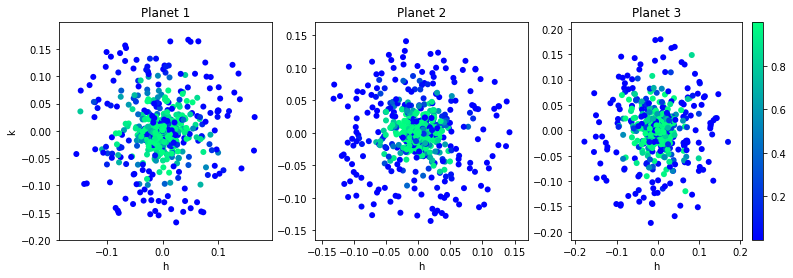

In [4]:
x = "h"
y = "k"
proba = results["predict_proba"].values

colorbar = 'winter'
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[13, 4])
ax1.scatter(data["%s1"%x][:len(proba)], data["%s1"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)
ax2.scatter(data["%s2"%x][:len(proba)], data["%s2"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)
c=ax3.scatter(data["%s3"%x][:len(proba)], data["%s3"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)

ax1.set_ylabel(y) 
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax3.set_xlabel(x)
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
cb = f.colorbar(c)
#plt.savefig("images/%s_%s%s.png"%(system,x,y))

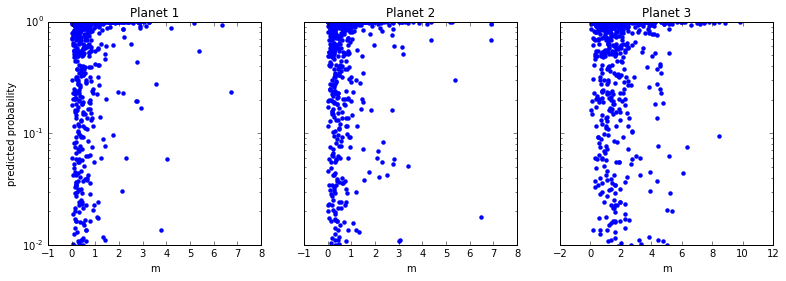

In [13]:
proba = results["predict_proba"].values

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[13, 4], sharey=True)
ax1.scatter(data["m1"][:len(proba)], proba, lw=0)
ax2.scatter(data["m2"][:len(proba)], proba, lw=0)
ax3.scatter(data["m3"][:len(proba)], proba, lw=0)

ax1.set_ylabel("predicted probability") 
ax1.set_yscale('log')
ax1.set_ylim([1e-2,1])
ax1.set_xlabel("m")
ax2.set_xlabel("m")
ax3.set_xlabel("m")
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
plt.savefig("images/%s_mproba.png"%system)

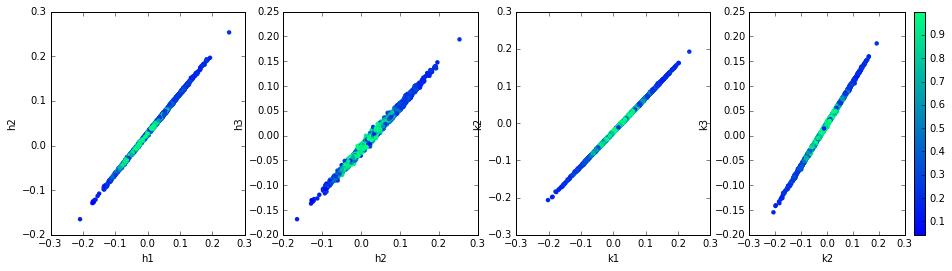

In [8]:
# h of neighboring pairs and k of neighboring pairs
x = "h"
y = "k"
proba = results["predict_proba"].values

colorbar = 'winter'
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=[16, 4])
ax1.scatter(data["%s1"%x], data["%s2"%x], c=proba, cmap=colorbar, lw=0)
ax2.scatter(data["%s2"%x], data["%s3"%x], c=proba, cmap=colorbar, lw=0)
ax3.scatter(data["%s1"%y], data["%s2"%y], c=proba, cmap=colorbar, lw=0)
c=ax4.scatter(data["%s2"%y], data["%s3"%y], c=proba, cmap=colorbar, lw=0)

ax1.set_ylabel("%s2"%x) 
ax1.set_xlabel("%s1"%x)
ax2.set_ylabel("%s3"%x)
ax2.set_xlabel("%s2"%x)
ax3.set_ylabel("%s2"%y) 
ax3.set_xlabel("%s1"%y)
ax4.set_ylabel("%s3"%y)
ax4.set_xlabel("%s2"%y)
cb = f.colorbar(c)
plt.savefig("images/%s_%s%s_in_vs_out.png"%(system,x,y))

## Analyze/Plot Results of Nbody Simulations

### Generate new predictions if desired

In [5]:
import pickle
modeldir = 'models/cPickle_No_Lya_Booster_Orb_1000000.pkl'
#modeldir = 'models/OptimalXGBmodel.pkl'
model = pickle.load(open(modeldir, 'rb'))
#model = cPickle.load(open(modeldir, 'rb'))

KeyError: '\n'

In [19]:
import time
from generatefeatures import generate_features
import pickle
def predict_system(system,data,Ms,modeldir,epoch=0):
    
    # run models
    start = time.time()
    fullfeatures = []
    for index, d in data[0:2].iterrows():
        fullfeatures.append(generate_features(d, Ms, epoch))
        print(index)
    print("Simulations took %f seconds"%(time.time() - start))
    
    model = pickle.load(open(modeldir, 'rb'))
    
    features = []
    features += ['avg_iH1', 'avg_iH2']
    features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
    features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
    features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
    features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
    features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
    features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
    features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
    #features += ['Lyapunov_time']
    
    # compile results - take only the features the model uses
    results = pd.DataFrame(columns=features)
    for i in range(len(fullfeatures)):
        results.loc[i] = fullfeatures[i][features] 
        
    # predict stability 
    return model.predict_proba(results)[:,1]

In [23]:
modeldir = "models/No_Lya_Model_Orb_100000.pkl"   #pre-trained machine learning model
#model = 'models/OptimalXGBmodel.pkl'

#run
predict_proba = predict_system(system,data,Ms[system],modeldir)
print predict_proba
#results['predict_proba'] = predict_proba

0
1
Simulations took 1.360531 seconds


KeyError: '\n'

### Separate real/shadow systems

In [35]:
results.head()

,Unnamed: 0,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,...,min_ecross2,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a1_slope,norm_a2_slope,norm_a3_slope,Lyapunov_time,predict_proba
0,0,0.0,0.0,0.000013,0.000040,0.000017,0.000039,0.000009,0.000031,0.000008,...,0.024294,0.0,0.0,0.005340,0.001523,-2.298472e-12,-4.439341e-13,1.087982e-12,3925.130174,0.999815
1,1,0.0,0.0,0.000007,0.000031,0.000009,0.000014,0.000023,0.000078,0.000018,...,0.011180,0.0,0.0,0.135368,0.131135,-3.182066e-12,6.102025e-12,-6.546894e-13,914.924491,0.989675
2,2,0.0,0.0,0.000014,0.000029,0.000014,0.000027,0.000063,0.000177,0.000060,...,0.464402,0.0,0.0,0.101708,0.000088,-1.207594e-13,5.399066e-12,-1.694417e-12,930.411663,0.017471
3,3,0.0,0.0,0.000304,0.000669,0.000220,0.000350,0.000084,0.000178,0.000061,...,0.084006,0.0,0.0,0.035023,0.000521,-5.260433e-10,1.430345e-10,-1.134995e-12,136.722612,0.153932
4,4,0.0,0.0,0.000032,0.000112,0.000028,0.000051,0.000034,0.000117,0.000049,...,0.179749,0.0,0.0,0.051646,0.000485,-4.415211e-12,8.135975e-12,-4.067736e-12,1574.518221,0.442657


In [36]:
#create shadow0 and shadow1 arrays
shadow0 = Nbody[Nbody["shadow"]==0].copy()
shadow1 = Nbody[Nbody["shadow"]==1].copy()
r0 = results.iloc[shadow0["id"]]
d0 = data.iloc[shadow0["id"]]
r1 = results.iloc[shadow1["id"]]
d1 = data.iloc[shadow1["id"]]
shadow0["orbital_periods"] = shadow0["time"]/(d0["P1"].values*2*np.pi/365)
shadow1["orbital_periods"] = shadow1["time"]/(d1["P1"].values*2*np.pi/365)
shadow0["predict_proba"] = r0["predict_proba"].values
shadow1["predict_proba"] = r1["predict_proba"].values

params = ["h1","k1","h2","k2","h3","k3"]
#add orbital parameters of interest
for p in params:
    shadow0[p] = d0[p].values
    shadow1[p] = d1[p].values
shadow1.head()

,name,id,shadow,maxorbs,P1,time,dE,elapsed_time,orbital_periods,predict_proba,h1,k1,h2,k2,h3,k3
5,Kepler-431_1e9orbits_id75_shadow1,75,1,1.000000e+09,0.117108,6964.164000,5.292666e-07,5.112272,59467.751090,0.000177,0.000102,0.000051,0.001070,-0.001201,-0.154362,0.073185
6,Kepler-431_1e9orbits_id150_shadow1,150,1,1.000000e+09,0.117108,343.505200,4.021618e-06,0.181674,2933.228128,0.000142,-0.121443,0.052433,0.003708,-0.001530,-0.100484,-0.043378
7,Kepler-431_1e9orbits_id165_shadow1,165,1,1.000000e+09,0.117108,3873.684000,1.927371e-05,1.927599,33077.807460,0.000799,-0.066820,-0.124449,0.039291,-0.007210,-0.018985,-0.003200
9,Kepler-431_1e9orbits_id89_shadow1,89,1,1.000000e+09,0.117108,1489.042000,5.662596e-07,0.800456,12715.091003,0.002120,-0.001966,0.003991,-0.010698,0.063158,-0.097548,0.014170
10,Kepler-431_1e9orbits_id12_shadow1,12,1,1.000000e+09,0.117108,1.245422,6.648246e-04,0.019746,10.634793,0.002480,0.050165,-0.141844,0.027664,0.059868,0.000842,0.000704


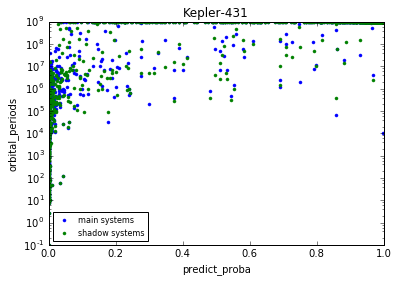

In [37]:
#2D plots
y = "orbital_periods"
x = "predict_proba"

plt.plot(shadow0[x], shadow0[y],'.',label='main systems')
plt.plot(shadow1[x], shadow1[y],'.',label='shadow systems')
plt.xlabel(x)
plt.ylabel(y)
plt.yscale('log')
#plt.xscale('log')
plt.title(system)
plt.legend(loc='lower left',fontsize=8,numpoints=1)
#plt.savefig('images/Nbody-%s_%sv%s.png'%(system,x,y))

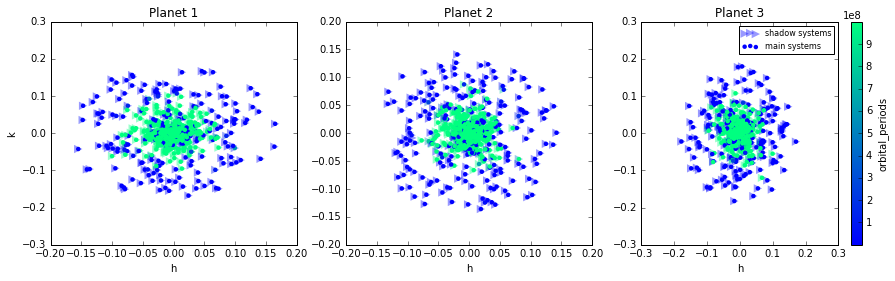

In [38]:
# 3D plots of Nbody results
x = "h"
y = "k"
c = "orbital_periods"

s = 70   #size of markers
m = ">"  #marker for shadow systems
alpha = 0.4 #alpha for shadow systems
colorbar = 'winter'

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15, 4])
ax1.scatter(shadow1["%s1"%x], shadow1["%s1"%y], c=shadow1[c], marker=m, s=s, alpha=alpha, cmap=colorbar, lw=0, label='shadow systems')
ax1.scatter(shadow0["%s1"%x], shadow0["%s1"%y], c=shadow0[c], cmap=colorbar, lw=0,label='main systems')
ax2.scatter(shadow1["%s2"%x], shadow1["%s2"%y], c=shadow1[c], marker=m, s=s, alpha=alpha, cmap=colorbar, lw=0, label='shadow systems')
ax2.scatter(shadow0["%s2"%x], shadow0["%s2"%y], c=shadow0[c], cmap=colorbar, lw=0,label='main systems')
ax3.scatter(shadow1["%s3"%x], shadow1["%s3"%y], c=shadow1[c], marker=m, s=s, alpha=alpha, cmap=colorbar, lw=0, label='shadow systems')
sc=ax3.scatter(shadow0["%s3"%x], shadow0["%s3"%y], c=shadow0[c], cmap=colorbar, lw=0,label='main systems')

ax1.set_ylabel(y) 
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax3.set_xlabel(x)
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
sc = f.colorbar(sc)
#cb = f.colorbar(sc, cax=cbar_ax)
sc.set_label(label=c, size=10)
plt.legend(fontsize=8, numpoints=1)
#plt.savefig('images/Nbody-%s_%sv%sv%s.png'%(system,x,y,c))

## Analyze Results of particular Simulation Archive Runs

In [9]:
thresh = 1e-4
Nbody.loc[Nbody["dE"]>thresh]

,name,id,shadow,maxorbs,P1,time,dE,elapsed_time
2,KOI-0156_1e9orbits_id773_shadow1,773,1,1.000000e+09,0.089313,54613.69,0.000716,46.44199
55,KOI-0156_1e9orbits_id1896_shadow1,1896,1,1.000000e+09,0.089313,1648814.00,0.000178,1406.74400
67,KOI-0156_1e9orbits_id435_shadow0,435,0,1.000000e+09,0.089308,32179440.00,0.000433,15464.01000
70,KOI-0156_1e9orbits_id216_shadow1,216,1,1.000000e+09,0.089313,15644800.00,0.000620,13415.23000
202,KOI-0156_1e9orbits_id215_shadow0,215,0,1.000000e+09,0.089313,1479310.00,0.000124,1254.37000
344,KOI-0156_1e9orbits_id1973_shadow0,1973,0,1.000000e+09,0.089314,79668210.00,0.000162,70686.07000


In [17]:
#load simulation archive of system with high final energy error
i=2

id_ = Nbody.loc[Nbody["dE"]>thresh,"id"].iloc[i]
shadow = Nbody.loc[Nbody["dE"]>thresh,"shadow"].iloc[i]
orbits = "1e9"
#dir_ = "saved_output/%s_simulation_archives"%system
dir_ = "saved_output"
sa = rebound.SimulationArchive("%s/%s_%sorbits_id%s_shadow%d_SA.bin"%(dir_,system,orbits,id_,shadow))
print("Number of snapshots: %d" % len(sa))
print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))

Number of snapshots: 361
Time of first and last snapshot: 0.0, 32150778.6


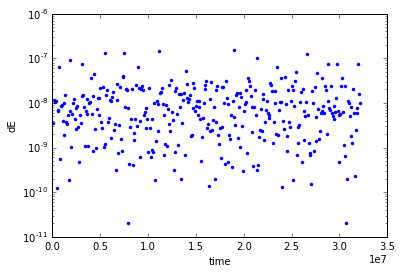

In [18]:
#Get energy at each checkpoint
sim = sa[0]
E0 = sim.calculate_energy()
dE = []
t = []

#get energies at each snapshot
for s in sa:
    dE.append(np.abs((s.calculate_energy() - E0)/E0))
    t.append(s.t)
    
plt.plot(t,dE,'.')
plt.ylabel("dE")
plt.xlabel("time")
plt.yscale('log')

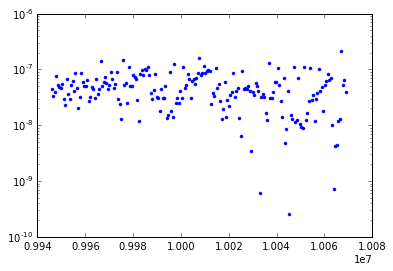

In [34]:
#simulate last few orbits - will take a second
sim = sa[0]
E0 = sim.calculate_energy()
dE = []
t = []

def collision(reb_sim, col):
    reb_sim.contents._status = 5 # causes simulation to stop running and have flag for whether sim stopped due to collision
    return 0

sim.collision = 'direct'
sim.collision_resolve = collision

s = sa[-1]
dt = sa[-1].t-sa[-2].t
for time in np.linspace(s.t,s.t+dt,200):
    s.integrate(time)
    t.append(s.t)
    dE.append(np.abs((s.calculate_energy() - E0)/E0))
    
plt.plot(t,dE,'.')
plt.yscale('log')

### Plot deviation of various orbital elements from simulation archives
See if orbital elements drift significantly even though it remained "stable" over 1e9 orbits.

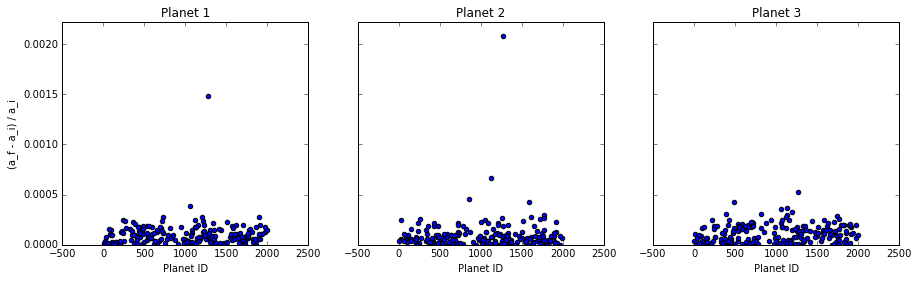

In [26]:
#prepare data
x = "a"     #what orbital element are you plotting?

shadow0 = Nbody[(Nbody["shadow"]==0)].copy()
d0 = data.iloc[shadow0["id"]]
shadow0["orbital_periods"] = shadow0["time"]/(d0["P1"].values*2*np.pi/365)
shadow0 = shadow0[shadow0["orbital_periods"]>9e8]

#get values
orbits = "1e9"
dir_ = "saved_output/%s_simulation_archives"%system
norm = []
for id_ in shadow0["id"]:
    sa = rebound.SimulationArchive("%s/%s_%sorbits_id%s_shadow0_SA.bin"%(dir_,system,orbits,id_))
    x1 = getattr(sa[0].particles[1],x)
    x2 = getattr(sa[0].particles[2],x)
    x3 = getattr(sa[0].particles[3],x)
    norm.append((np.abs(getattr(sa[-1].particles[1],x)-x1)/x1, #final - initial
                 np.abs(getattr(sa[-1].particles[2],x)-x2)/x2,
                 np.abs(getattr(sa[-1].particles[3],x)-x3)/x3))
    
o1, o2, o3 = np.asarray(zip(*norm))
    
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15, 4], sharey=True)
ax1.scatter(shadow0["id"], o1)
ax2.scatter(shadow0["id"], o2)
ax3.scatter(shadow0["id"], o3)
ax1.set_ylim([0,1.5*max(o1)])
ax1.set_xlabel("Planet ID")
ax2.set_xlabel("Planet ID")
ax3.set_xlabel("Planet ID")
ax1.set_ylabel("(%s_f - %s_i) / %s_i"%(x,x,x))
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")

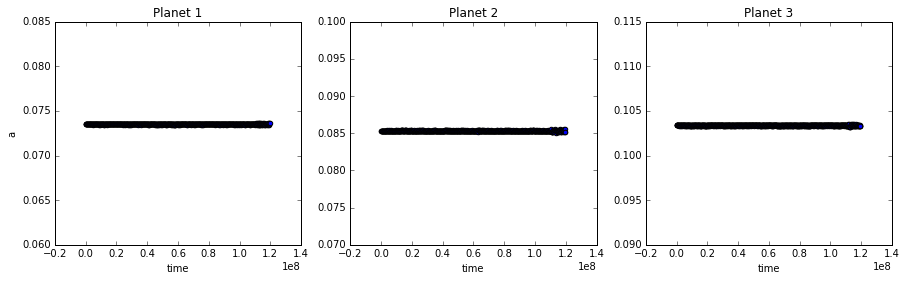

In [27]:
#check out specific system
i=0
ids = shadow0["id"].values
id_ = ids[np.where(o2 > 0.0015)[0][i]]

sa = rebound.SimulationArchive("%s/%s_%sorbits_id%s_shadow0_SA.bin"%(dir_,system,orbits,id_))
t, arr = [], []
for s in sa:
    arr.append((getattr(s.particles[1],x), getattr(s.particles[2],x), getattr(s.particles[3],x)))
    t.append(s.t)
    
a4, a5, a6 = zip(*arr)
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15, 4])
ax1.scatter(t, a4)
ax2.scatter(t, a5)
ax3.scatter(t, a6)
ax1.set_xlabel("time")
ax2.set_xlabel("time")
ax3.set_xlabel("time")
ax1.set_ylabel(x)
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")

# Scratch

In [11]:
#check all sims finished are there...
array = zip(Nbody["id"].values,Nbody["shadow"].values)
for i in np.arange(250,1450):
    if ((i,0) not in array) or ((i,1) not in array):
        print "%d not done"%i

745 not done
1194 not done
1288 not done
1292 not done
